## **Pengantar BERT**

Model BERT (*Bidirectional Encoder Representations from Transformers*) adalah model bahasa yang dikembangkan oleh Google pada tahun 2018.

Salah satu fitur utama BERT adalah kemampuannya untuk memahami konteks dari kata-kata yang ada di sekitarnya. Sebelum BERT, model bahasa berkinerja tinggi lainnya, seperti word embeddings dan model berbasis LSTM (*Long Short-Term Memory*), mungkin hanya memperhitungkan kata-kata sebelumnya dalam kalimat (disebut "konteks kiri") atau kata-kata setelahnya (disebut "konteks kanan"). Namun, BERT memperhitungkan kata-kata di kedua arah sebelum menghasilkan representasi kata.

Model BERT dilatih pada korpus teks besar dengan pendekatan "unsupervised learning", yang berarti tidak memerlukan label khusus untuk tugas tertentu. Selama pelatihan, BERT mempelajari representasi kata yang lebih baik dengan memprediksi kata apa yang hilang dari suatu konteks, dengan melibatkan kata-kata di sekitarnya. Dengan pendekatan ini, BERT bisa menangkap makna dan hubungan antarkata dengan lebih baik.

## **Arsitektur BERT**


Arsitektur BERT didasarkan pada transformer, sebuah arsitektur neural network yang sangat sukses dalam tugas-tugas pemrosesan bahasa alami. Arsitektur transformer memiliki dua komponen utama: encoder dan decoder. Namun, dalam konteks BERT, hanya encoder yang digunakan.

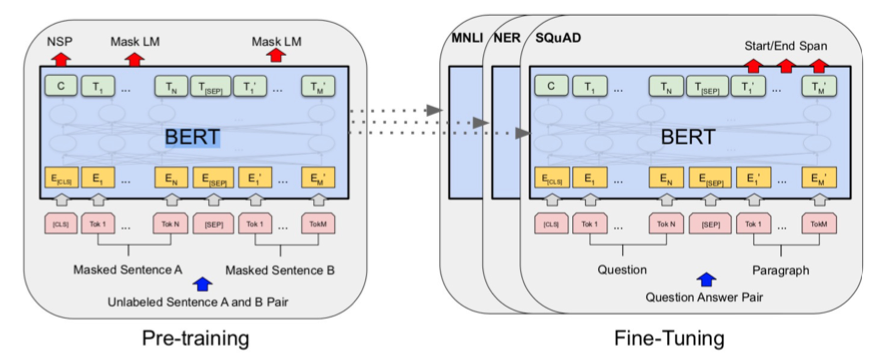

Beberapa komponen utama dalam arsitektur BERT antara lain:
1. ***Input Embedding***: Setiap kata dalam kalimat dimasukkan ke dalam ruang vektor dengan dimensi tertentu.
2. ***Transformer Encoder***: Ini adalah inti dari arsitektur BERT. Transformer encoder terdiri dari beberapa blok encoder yang identik. Setiap blok terdiri dari dua sub-blok: self-attention mechanism dan feed-forward neural network. *Self-attention mechanism* memungkinkan model untuk memperhitungkan interaksi antara kata-kata dalam kalimat, sedangkan *feed-forward neural network* digunakan untuk memproses informasi tersebut.
3. ***Multi-Head Attention***: Dalam self-attention mechanism, input dari setiap kata dipecah menjadi tiga vektor: query, key, dan value. Kemudian, perhitungan attention dilakukan untuk menghitung tingkat relevansi antara kata-kata tersebut. Dalam multi-head attention, proses ini dilakukan beberapa kali dengan bobot yang berbeda untuk mendapatkan representasi yang lebih kuat.
4. ***Layer Normalization***: Setiap blok encoder diikuti oleh layer normalization, yang membantu dalam stabilisasi pelatihan dan akselerasi konvergensi.
5. ***Output Layer***: Output dari blok terakhir encoder (atau beberapa blok terakhir, tergantung pada arsitektur yang digunakan) digunakan untuk berbagai tugas pemrosesan bahasa alami, seperti klasifikasi teks atau pemahaman pertanyaan jawaban.

## **Model BERT Pra-pelatihan/Pre-train yang Dikembangkan**

BERT disebut sebagai model "pretraining" karena selama tahap pertama dari proses pelatihan, model ini dilatih pada tugas "unsupervised learning" yang disebut pretraining. Pretraining adalah proses di mana model dilatih pada data besar tanpa label untuk mempelajari representasi yang kaya dan umum tentang bahasa alami.

Selama tahap pretraining BERT, model dibimbing untuk memprediksi kata yang hilang dalam sebuah teks. Misalnya, dalam sebuah kalimat, beberapa kata mungkin akan diacak dan diganti dengan sebuah token [MASK]. Model kemudian diberi tugas untuk memprediksi kata yang asli dari kalimat tersebut berdasarkan konteks sekitarnya. Selain itu, model juga diberi tugas untuk memprediksi apakah dua kalimat yang diberikan dalam satu input adalah berurutan atau tidak.

Tujuan dari pretraining adalah untuk membantu model memahami dan merepresentasikan bahasa secara umum sehingga bisa digunakan untuk berbagai tugas pemrosesan bahasa alami yang spesifik. Setelah pretraining, model BERT dapat digunakan sebagai dasar untuk tugas-tugas klasifikasi, penerjemahan, pemahaman pertanyaan-jawaban, dan lainnya.

Saat model BERT digunakan untuk tugas-tugas tertentu setelah pretraining, proses ini disebut "fine-tuning". Fine-tuning melibatkan melatih kembali bagian tertentu dari model pada dataset yang sesuai dengan tugas yang ingin diselesaikan. Fine-tuning memungkinkan model untuk mengubah representasinya yang sudah dipelajari selama pretraining untuk menyesuaikan dengan tugas khusus yang ingin dipecahkan.

Model pre-train BERT sudah banyak diaplikasikan dan dikembangkan oleh banyak peneliti dengan berbagai bahasa dan peruntukan, dapat dieksplorasi melalui web [Huggingface](https://huggingface.co/), seperti beberapa model berikut:
1. BERT BASE UNCASED (BERT untuk Bahasa Inggris yang dikembangkan oleh Google) dan dapat diakses melalui web berikut: (https://huggingface.co/google-bert/bert-base-uncased)
2. BERT MULTILINGUAL CASED yang dikembangkan untuk 104 bahasa di dunia, dapat diakses melalui web berikut: (https://huggingface.co/google-bert/bert-base-multilingual-cased)
3. BERT INDONESIAN (BERT yang dikembangkan untuk Bahasa Indonesia) dikembangkan berdasarkan corpus data train sebesar 522M (https://huggingface.co/cahya/bert-base-indonesian-522M) dan 1.5GB (https://huggingface.co/cahya/bert-base-indonesian-1.5G)

## **Tahapan Analisis Sentimen dengan BERT**

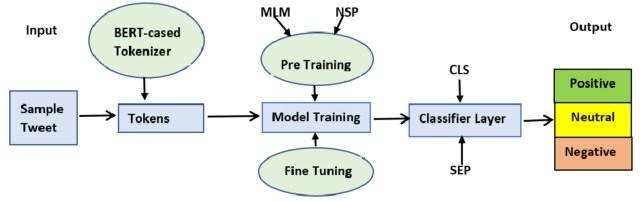
Sumber: [Sadia dan Basak (2021)](https://www.researchgate.net/publication/351648377_Sentiment_Analysis_of_COVID-19_Tweets_How_Does_BERT_Perform)

## **Persiapan Modul dan Package**

In [30]:
# !pip install keras==2.15.0
# !pip install tensorflow==2.15.0
# !pip install transformers==4.37.2

In [1]:
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
# import segmentation_models as sm
import tensorflow as tf
# import tensorflow_hub as hub
from tensorflow.python.keras.optimizer_v2 import adam as adam_v2
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Input, Dense, Embedding, Dropout, Conv1D, MaxPooling1D, Bidirectional, Attention
import tensorflow.keras.backend as K

!pip install scikeras
from scikeras.wrappers import KerasClassifier

from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, classification_report, precision_score, roc_auc_score, accuracy_score, recall_score, balanced_accuracy_score, make_scorer

import transformers
from transformers import BertTokenizer, TFBertModel, BertConfig, TFBertForSequenceClassification

# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.combine import SMOTEENN, SMOTETomek

import plotly.express as px
import itertools
from itertools import product
import re
import unicodedata
# import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')
from tqdm import tqdm
import pickle

## **Persiapan Data**

In [2]:
data = pd.read_csv('/content/data_sentimen.csv', sep=';')[['raw', 'processed', 'label']]
data

,raw,processed,label
0,Enak sih ujan terus. Tapi ini banjir mulu ih c...,enak sih ujan terus banjir terus ih cape,NEGATIF
1,parnoan bjir ga bisa tidur ngeliatin jendela m...,parnoan bjir tidur melihati jendela terus taku...,NEGATIF
2,"LAH BANJIR COK RUMAH ANYINKKKKKKK, BOLO GR GR ...",banjir cok rumah anyink bolo gara gara kucing ...,NEGATIF
3,rumah ak banjir 😭😭,rumah banjir,NEGATIF
4,Semoga ga banjir,semoga banjir,NEGATIF
...,...,...,...
94,Alhamdulillah. Ujan ampe banjir 🥰,alhamdulillah ujan banjir,POSITIF
95,i know ini gak baik tp aku pingin hujan yang d...,know baik pengin hujan dua hari dua malam banj...,POSITIF
96,PKS berperan aktif dalam penanggulangan bencan...,pks berperan aktif penanggulangan bencana teru...,POSITIF
97,"PKS selalu siaga dalam memberikan bantuan, sok...",pks siaga memberikan bantuan sokongan perlindu...,POSITIF


Dapat juga dilakukan beberapa eksplorasi sederhana seperti berikut.

##### **Eksplorasi Proporsi Label**

In [3]:
piv = data.pivot_table(index=['label'], aggfunc='size').reset_index(name='count')
piv

,label,count
0,NEGATIF,33
1,NETRAL,33
2,POSITIF,33


In [4]:
x_lab = ['NEGATIF', 'NETRAL', 'POSITIF']

fig = go.Figure()
fig.add_trace(go.Bar(
    x= x_lab,
    y=piv['count'],
    name='Data',
    marker_color=['red', 'gold', 'green'],
    textposition='auto',
    text=piv['count']
))

fig.update_layout(barmode='group', xaxis_tickangle=0, width = 1000, height = 600)
fig.show()

##### **WordCloud**

In [ ]:
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [ ]:
# TF-IDF
def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])

def doTFIDFVectorize(df, col_name):
    max_features = 1000
    tf_idf = TfidfVectorizer(max_features=max_features, binary=True)
    tfidf_mat = tf_idf.fit_transform(df[col_name]).toarray()
    return(tf_idf, tfidf_mat)

def rankTFIDF(df, col_name):
    tf_idf, tf_idf_mat = doTFIDFVectorize(df, col_name)
    terms = tf_idf.get_feature_names_out()
    sums = tf_idf_mat.sum(axis=0)
    data = []
    for col, term in enumerate(terms):
        data.append((term, sums[col]))
    ranking = pd.DataFrame(data, columns=['term','rank'])
    ranking2 = ranking.sort_values('rank', ascending=False)
    return(ranking2)

In [ ]:
rank_tfidf = rankTFIDF(data.dropna(), "processed")
rank_tfidf

,term,rank
52,banjir,10.975914
193,hujan,3.810548
50,banget,3.795654
475,semoga,3.311264
210,jakarta,2.865386
...,...,...
182,gwh,0.181722
184,hahay,0.181722
379,mogok,0.181722
380,mtor,0.181722


In [ ]:
words = rank_tfidf.set_index('term')['rank'].to_dict()
words

{'banjir': 10.975913682128741,
 'hujan': 3.810547691104937,
 'banget': 3.795653680966188,
 'semoga': 3.3112637114458483,
 'jakarta': 2.86538625350815,
 'ujan': 2.748106394350613,
 'terus': 2.2280335891857397,
 'awet': 2.0330470701049,
 'bantuan': 1.9869359668439035,
 'semarang': 1.9623769742735653,
 'jadi': 1.89979059507867,
 'rumah': 1.8298847455010052,
 'anjing': 1.8207825760579528,
 'membantu': 1.7518860841517658,
 'kasih': 1.7435051520812326,
 'tempat': 1.6669123126656287,
 'daerah': 1.6336208076553385,
 'masyarakat': 1.5906592024533652,
 'pks': 1.541034062868162,
 'dimana': 1.4915130379842396,
 'hari': 1.4892146667485524,
 'amp': 1.4760077072754354,
 'untuk': 1.4416212498434176,
 'terima': 1.4382042243571305,
 'macet': 1.4244866911076026,
 'kemang': 1.3891892509322754,
 'baru': 1.3415333332283343,
 'air': 1.3414107286756796,
 'informasi': 1.3241573924472312,
 'mengatasi': 1.2974667560216675,
 'alhamdulillah': 1.246576562116907,
 'beban': 1.2190502833030057,
 'meringankan': 1.21905

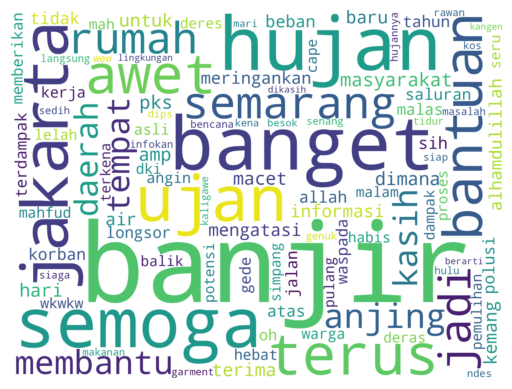

In [ ]:
wc = WordCloud(width=2000, height=1500, max_words=100, background_color='white').generate_from_frequencies(words)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## **Tuning Parameter**

Banyak hyperparameter yang dapat di-tune dalam melakukan training BERT dengan data kita, tetapi berikut merupakan acuan yang diberikan oleh penelitian [Koto et al (2020)](https://arxiv.org/abs/2011.00677).

In [3]:
from itertools import product
param_grid = {
    'epochs': [4, 8],
    'learning_rate': [3e-4, 1e-4, 5e-5, 3e-5],
    'batch_size': [8, 16, 32, 64]
}
params = pd.DataFrame(product(*param_grid.values()), columns=param_grid.keys())
params.head()

,epochs,learning_rate,batch_size
0,4,0.0003,8
1,4,0.0003,16
2,4,0.0003,32
3,4,0.0003,64
4,4,0.0001,8


Parameter ini bisa dilakukan proses tuning dengan skema Grid Search atau dapat menggunakan acuan lain dengan mekanisme Random Search, dengan konsekuensi waktu yang digunakan lebih lama.

Mengingat keterbatasan waktu, digunakan parameter berikut:
* Epochs = 4
* LR = 0.0001
* Batch Size = 32

## **Training**

In [34]:
import os
os.environ["TF_USE_LEGACY_KERAS"] ="1"

##### Mendefinisikan Model Pre-Trained yang digunakan

In [35]:
tokenizer = BertTokenizer.from_pretrained("cahya/bert-base-indonesian-522M")

In [41]:
def ModelBERT():
  pretrained = "cahya/bert-base-indonesian-522M"
  configuration = BertConfig.from_pretrained(pretrained, num_labels = 3)
  configuration.hidden_dropout_prob = 0.02
  configuration.attention_probs_dropout_prob = 0.02
  model = TFBertForSequenceClassification.from_pretrained(pretrained, config = configuration)
  return(model)

Dalam model di atas, digunakan model milik Cahya Wirawan yang diakses melalui link [berikut](https://github.com/cahya-wirawan/indonesian-language-models/tree/master/Transformers). Selain itu untuk menghindari overfitting, digunakan juga probabilitas dropout untuk hidden layer dan attention layer sebesar 0.02.

##### Menyiapkan Data

In [5]:
data = data.reset_index(drop=True)
data = shuffle(data)
max_len = 256

In [6]:
sentences = data['processed']
labels = data['label']

Sebagaimana kita pelajari sebelumnya, bahwa dalam model Transformers dibutuhkan dua tipe data input yaitu InputID dan Attention Masks, maka kita siapkan dahulu datanya.

In [7]:
input_ids=[]
attention_masks=[]

for sent in sentences:
  # encoding
  bert_inp = tokenizer.encode_plus(sent, add_special_tokens = True, max_length = max_len, pad_to_max_length = True, return_attention_mask = True)
  input_ids.append(bert_inp['input_ids'])
  attention_masks.append(bert_inp['attention_mask'])

input_ids=np.asarray(input_ids)
attention_masks=np.array(attention_masks)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [8]:
bert_inp

{'input_ids': [3, 5061, 5509, 3287, 1994, 2715, 7337, 8079, 9168, 7558, 7516, 24753, 1020, 19681, 29965, 1610, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Kemudian kita juga harus mendefinisikan data latih untuk pelatihan dan uji untuk validasi. Dalam hal ini perbandingannya 80:20.

In [14]:
train_inp, val_inp, train_label, val_label, train_mask, val_mask = train_test_split(input_ids, labels, attention_masks, test_size=0.2, stratify = labels, random_state=1000)

Selain itu, kita siapkan data output yang telah dilakukan mekanisme OneHot Encoding.

In [15]:
# menjadikan peubah Y sebagai tipe array
labels=np.array(labels)

In [16]:
def oneHotEncode(listArray):
  s = (len(listArray),len(np.unique(listArray)))
  tempData = np.zeros(s)
  for i in range(len(listArray)):
    if listArray[i] == 'NEGATIF':
      tempData[i][0] = 1
    elif listArray[i] == 'NETRAL':
      tempData[i][1] = 1
    elif listArray[i] == 'POSITIF':
      tempData[i][2] = 1
  return tempData

In [17]:
train_label = oneHotEncode(train_label)
val_label = oneHotEncode(val_label)

In [18]:
train_label

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

Dalam model ini juga bisa dilakukan penyimpanan bobot/weight yang jika kita akan menerapkan model pada data baru, hasil training dapat kita akses melalui file *weight* tersebut.

In [19]:
# kalau disini disimpan di temporary Colab
log_dir='tensorboard_data/tb_bert'
model_save_path='/model_bert.h5'
weight_path = '/content/sample_data/weights.h5'

## **Validation**

Banyak jenis metrik validasi yang dapat digunakan, dapat diakses melalui web [berikut](https://www.tensorflow.org/api_docs/python/tf/keras/metrics).

In [36]:
def getValidationModel(history, time_callback):
  dict_res = {
        'acc' : history.history["accuracy"][-1],
        'f1' : history.history["f1"][-1],
        'loss' : history.history["loss"][-1],
        'val_acc' : history.history["val_accuracy"][-1],
        'val_f1' : history.history["val_f1"][-1],
        'val_loss' : history.history["val_loss"][-1],

        # bisa dilakukan penyimpanan durasi juga
        'duration' : np.mean(time_callback.times)
    }
  return(dict_res)

METRICS = [
    tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
    tf.keras.metrics.F1Score(name = "f1", average = 'weighted')
]

## **Eksekusi Model**

Pertama kita juga definisikan beberapa properti yang dibutuhkan (opsional). Properti ini tidak wajib ada tetapi dapat membantu performa komputer dalam melakukan pemodelan berskala tinggi.

1. Time Callback, gunanya untuk memperoleh waktu running model.

In [21]:
import time
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

time_callback = TimeHistory()

2. ReduceLROnPlateau, digunakan untuk menurunkan nilai LR ketika model tidak menunjukkan peningkatan kinerja agar beban prosesor tidak terlalu berat. Baca dokumentasinya di [sini](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau).

In [22]:
reduce_lr = ReduceLROnPlateau(monitor='val_acc',
                              factor=0.1,
                              patience=3,
                              verbose=1,
                              min_lr=0.0000001)

3. ModelCheckpoints, digunakan dalam mekanisme penyimpanan weights. Dokumentasinya di [sini](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint).

In [23]:
checkpoints = ModelCheckpoint('.weights.h5',
                              save_weights_only=True,
                              monitor='val_acc', # dalam hal ini weight terbaik disimpan berdasarkan akurasi data uji tertinggi
                              mode='max',
                              save_best_only=True,
                              verbose = True),

4. [TensorBoard](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard), untuk visualisasi.

In [24]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

##### Mendefinisikan Loss Function dan Optimizer

Loss function adalah sebuah fungsi yang digunakan untuk menghitung perbedaan antara keluaran yang dibuat oleh algoritma saat ini dengan keluaran yang diharapkan. Categorical Cross Entropy - digunakan untuk tugas biner dan multiclass. Jenis Cross Entropy ini membutuhkan label untuk dikodekan sebagai kategori. Sebagai contoh;one-hot-encoding untuk 3 kelas akan menggunakan representasi ini: [0, 1, 0], [1,0,0]…). Sementara Optimizer adalah fungsi yang digunakan untuk memperbarui bobot dalam proses training model.

In [37]:
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, epsilon=1e-8)

##### **Compile**

In [42]:
model = ModelBERT()
model.compile(loss=loss, optimizer=optimizer, metrics = METRICS)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at cahya/bert-base-indonesian-522M and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


AttributeError: 'Variable' object has no attribute '_distribute_strategy'